# Tarea 1: Regresión lineal

Crea una regresión lineal con los demás inputs numericos

'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households'

- Realiza un analisis bivariado de cada uno de estos
- Escribe la ecuación del modelo 
- Obtener R2 y mean squared error
- Grafica las predicciones 

Responde la pregunta: ¿Cuál es el mejor modelo de estos? ¿Por qué?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Visualización de datos

In [2]:
df = pd.read_csv('housing.csv')

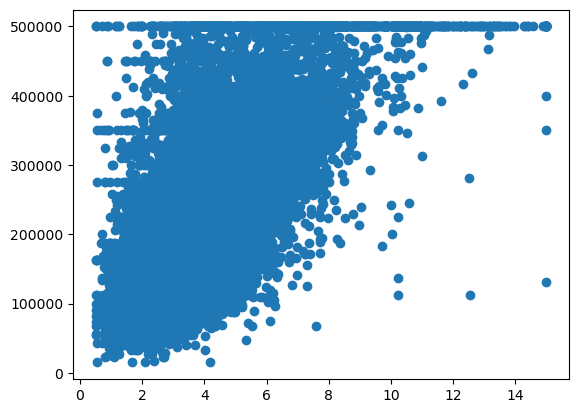

In [3]:
plt.scatter(df['median_income'], df['median_house_value'])

In [4]:
df = df[df.median_house_value != df.median_house_value.max()]

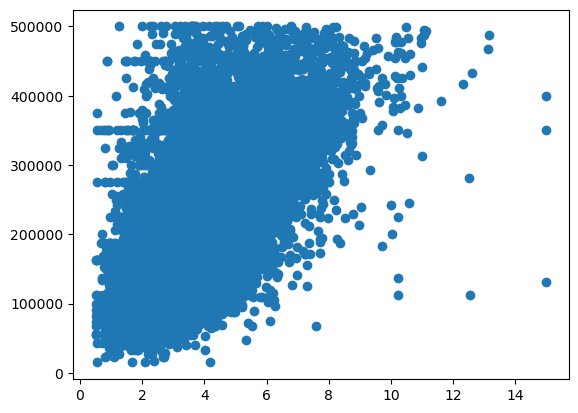

In [5]:
plt.scatter(df['median_income'], df['median_house_value'])

## Elección de variables

In [12]:
df = df.drop(columns=['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,housing_median_age_bin
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,9
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,10
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,10
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,10


Se utilizarán las siguientes variables para predecir el precio de las casas:

- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income

## Regresiones

In [7]:
y = df['median_house_value']

### Housing median age

In [8]:
X = df[['housing_median_age']]
model = linear_model.LinearRegression().fit(X, y)

print(f'Ecuación del modelo: {model.intercept_} + {model.coef_[0]} * {X.keys()[0]}')

print("r2:",r2_score(y, model.predict(X)))

print("MSE:",mean_squared_error(y, model.predict(X)))

Ecuación del modelo: 177411.79806093415 + 530.7537495991417 * housing_median_age
r2: 0.004616870761556036
MSE: 9502976334.705992


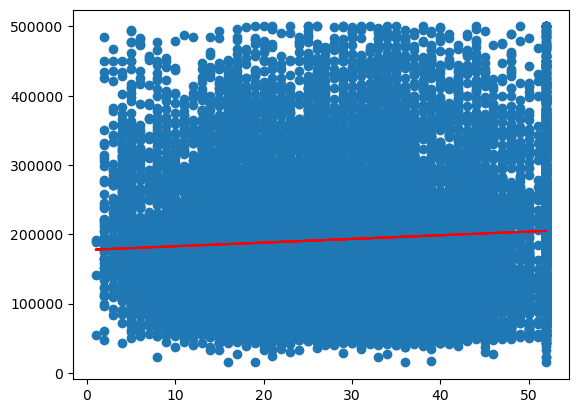

In [9]:
plt.scatter(df['housing_median_age'], df['median_house_value'])
plt.plot(X, model.predict(X), color='red')

Como podemos notar en la gráfica el modelo de regresión obtenido es muy malo, además esto se respalda gracias al r2 obtenido de 0.004, lo que significa que es muy ligeramente mejor al promedio, lo cual se ve en la linea del modelo. Por lo tanto la variable de la edad de la casa por si sola no es buena para predecir el precio de las casas.

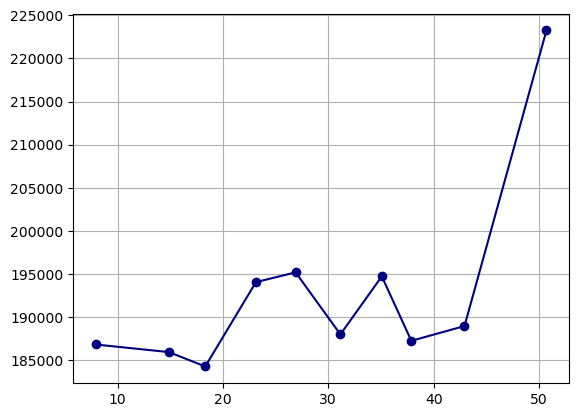

In [19]:
df['housing_median_age_bin'] = pd.qcut(df['housing_median_age'], 10, labels=False) + 1
grouped_median_age = df.groupby('housing_median_age_bin').mean()
plt.plot(grouped_median_age.housing_median_age, grouped_median_age.median_house_value, marker = 'o', c = 'navy')
plt.grid();

### Total rooms

In [70]:
X = df[['total_rooms']]
model = linear_model.LinearRegression().fit(X, y)

print(f'Ecuación del modelo: {model.intercept_} + {model.coef_[0]} * {X.keys()[0]}')
print("r2:",r2_score(y, model.predict(X)))
print("MSE:",mean_squared_error(y, model.predict(X)))

Ecuación del modelo: 175680.60158723383 + 6.4117690038903685 * total_rooms
r2: 0.020488694351853853
MSE: 9351447180.215874


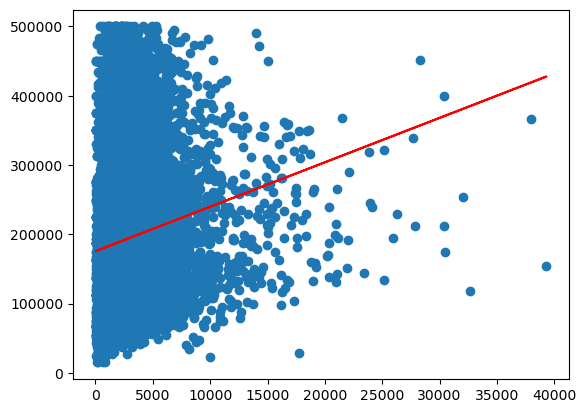

In [71]:
plt.scatter(df['total_rooms'], df['median_house_value'])
plt.plot(X, model.predict(X), color='red')

Bla bal 

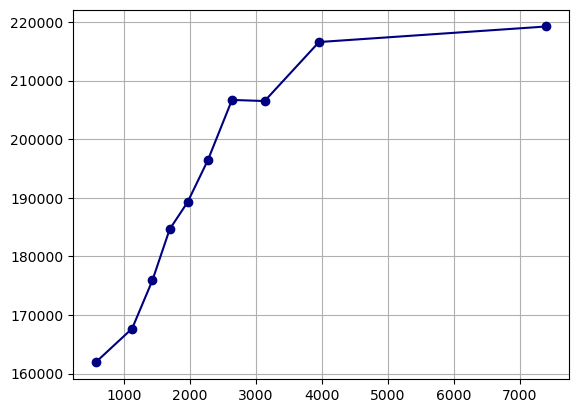

In [20]:
df['total_rooms_bin'] = pd.qcut(df['total_rooms'], 10, labels=False) + 1
grouped_total_rooms = df.groupby('total_rooms_bin').mean()
plt.plot(grouped_total_rooms.total_rooms, grouped_total_rooms.median_house_value, marker = 'o', c = 'navy')
plt.grid();

### Total bedrooms

In [72]:
X = df[['total_bedrooms']]
X = X.fillna(0)
model = linear_model.LinearRegression().fit(X, y)

print(f'Ecuación del modelo: {model.intercept_} + {model.coef_[0]} * {X.keys()[0]}')
print("r2:",r2_score(y, model.predict(X)))
print("MSE:",mean_squared_error(y, model.predict(X)))

Ecuación del modelo: 183455.69921142812 + 16.890480810370605 * total_bedrooms
r2: 0.005365082732013637
MSE: 9495833114.733957


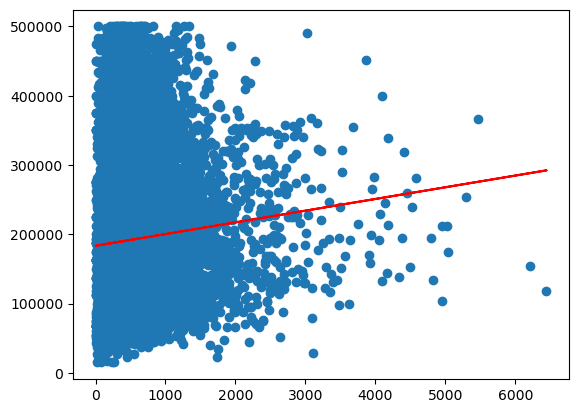

In [73]:
plt.scatter(df['total_bedrooms'], df['median_house_value'])
plt.plot(X, model.predict(X), color='red')

bla bla 

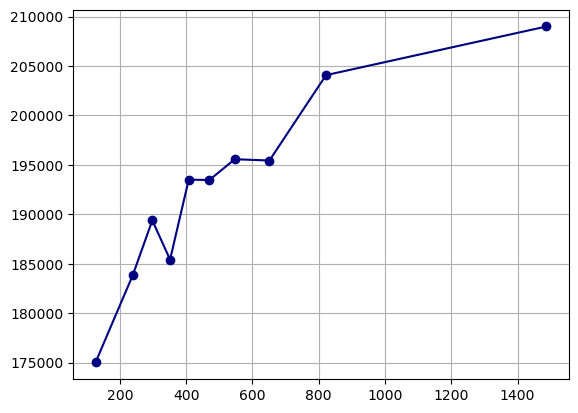

In [21]:
df['total_bedrooms_bin'] = pd.qcut(df['total_bedrooms'], 10, labels=False) + 1
grouped_total_bedrooms = df.groupby('total_bedrooms_bin').mean()
plt.plot(grouped_total_bedrooms.total_bedrooms, grouped_total_bedrooms.median_house_value, marker = 'o', c = 'navy')
plt.grid();

### Population

In [74]:
X = df[['population']]
model = linear_model.LinearRegression().fit(X, y)

print(f'Ecuación del modelo: {model.intercept_} + {model.coef_[0]} * {X.keys()[0]}')
print("r2:",r2_score(y, model.predict(X)))
print("MSE:",mean_squared_error(y, model.predict(X)))

Ecuación del modelo: 191005.0921058971 + 1.0222212946557103 * population
r2: 0.00014314747840926678
MSE: 9545687211.793383


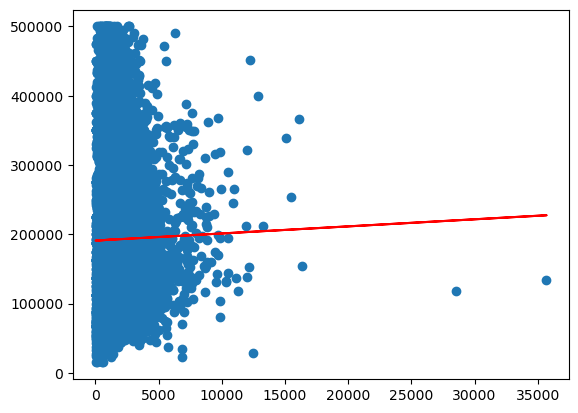

In [75]:
plt.scatter(df['population'], df['median_house_value'])
plt.plot(X, model.predict(X), color='red')

bla bla 

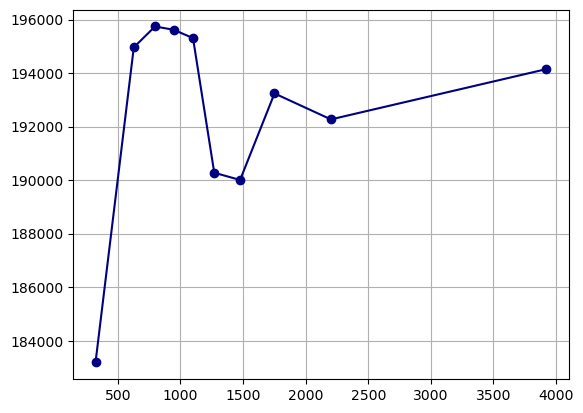

In [22]:
df['population_bin'] = pd.qcut(df['population'], 10, labels=False) + 1
grouped_population = df.groupby('population_bin').mean()
plt.plot(grouped_population.population, grouped_population.median_house_value, marker = 'o', c = 'navy')
plt.grid();

### Households

In [76]:
X = df[['households']]
model = linear_model.LinearRegression().fit(X, y)

print(f'Ecuación del modelo: {model.intercept_} + {model.coef_[0]} * {X.keys()[0]}')
print("r2:",r2_score(y, model.predict(X)))
print("MSE:",mean_squared_error(y, model.predict(X)))

Ecuación del modelo: 180352.83033455737 + 24.192794947647357 * households
r2: 0.009004884338978392
MSE: 9461083732.794487


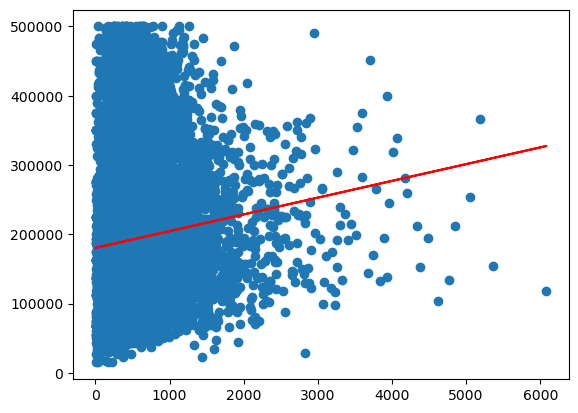

In [77]:
plt.scatter(df['households'], df['median_house_value'])
plt.plot(X, model.predict(X), color='red')

bla bla 

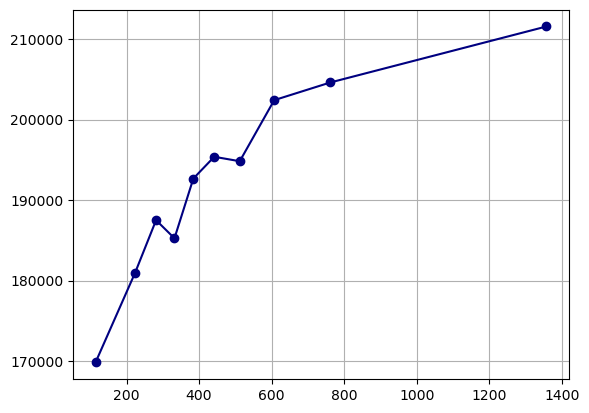

In [23]:
df['households_bin'] = pd.qcut(df['households'], 10, labels=False) + 1
grouped_households = df.groupby('households_bin').mean()
plt.plot(grouped_households.households, grouped_households.median_house_value, marker = 'o', c = 'navy')
plt.grid();

### Median income

In [78]:
X = df[['median_income']]
model = linear_model.LinearRegression().fit(X, y)

print(f'Ecuación del modelo: {model.intercept_} + {model.coef_[0]} * {X.keys()[0]}')
print("r2:",r2_score(y, model.predict(X)))
print("MSE:",mean_squared_error(y, model.predict(X)))

Ecuación del modelo: 45456.9967823177 + 39987.01206231503 * median_income
r2: 0.41294861985820197
MSE: 5604611138.037092


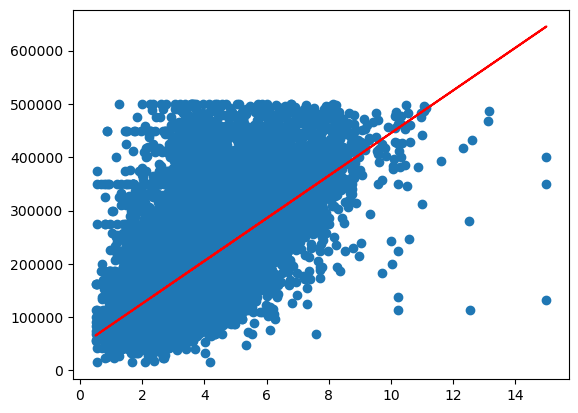

In [79]:
plt.scatter(df['median_income'], df['median_house_value'])
plt.plot(X, model.predict(X), color='red')

bla bal

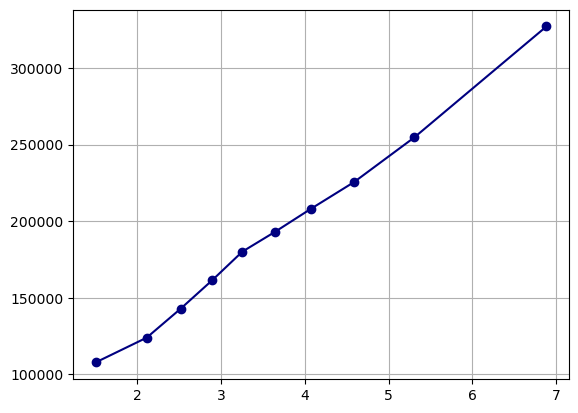

In [27]:
df['median_income_bin'] = pd.qcut(df['median_income'], 10, labels=False) + 1
grouped_income = df.groupby('median_income_bin').mean()
plt.plot(grouped_income.median_income, grouped_income.median_house_value, marker = 'o', c = 'navy')
plt.grid();

## Conclusiones

Una vez realizados los seis modelos con las variable numéricas y haber calculado su r2, nos podemos dar cuenta que cinco de ellos son modelos muy malos pues el de mayor r2 es de 0.02 lo cual significa que solo es mejor por un 2% al promedio de los datos. Sin embargo, el sexto modelo que fue utilizando como variable predictora el "median_income", resulto ser un modelo mejor ya que tuvo una r2 de 0.41, lo que significa que un 41% de la variación de los datos es explicada gracias al modelo, lo cual ya da algo de poder predictivo y si es bastante mejor que usar simplemente el promedio de los datos. Este modelo lo que nos dice es que por cada $\$1000$ de incremento en el ingreso, el valor de la casa aumenta $\$39,987$, un defecto de este modelo es que una persona sin ingresos tendría una casa de un valor de $\$45,456$ lo cual no es posible en la realidad.